# Práctica 2

In [1]:
# Data Wrangling
import os
import shutil
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image

# Modeling
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Data Visualization
# import cufflinks as cf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Configuración del notebook
# cf.go_offline()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.FATAL)

2025-02-27 14:05:09.061857: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/josemariareyesfigueroa/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
pokemones = pd.read_csv('./dataset/pokemon.csv')

In [3]:
pokemones.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [4]:
pokemones.shape

(809, 3)

In [5]:
pokemones['Type1'].value_counts()

Type1
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64

In [6]:
pokemones['Type1'].value_counts() / pokemones.shape[0]

Type1
Water       0.140915
Normal      0.129790
Grass       0.096415
Bug         0.088999
Fire        0.065513
Psychic     0.065513
Rock        0.056860
Electric    0.049444
Poison      0.042027
Ground      0.039555
Dark        0.035847
Fighting    0.035847
Ghost       0.033375
Dragon      0.033375
Steel       0.032138
Ice         0.028430
Fairy       0.022250
Flying      0.003708
Name: count, dtype: float64

In [7]:
pokemones

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [8]:
for t in pokemones['Type1'].unique():
    #Crea una carpeta por cada tipo de pokemon
    os.makedirs(f'./{t}', exist_ok=True)

for p in pokemones['Name']:
    ext = 'png'
    im = f'./dataset/images/{p}.png'
    if os.path.exists(im):
        shutil.copy(im, f'./{pokemones[pokemones["Name"] == p]["Type1"].values[0]}')
    else:
        shutil.copy(f'./dataset/images/{p}.jpg', f'./{pokemones[pokemones["Name"] == p]["Type1"].values[0]}')

## Data Visualization

Type: Grass


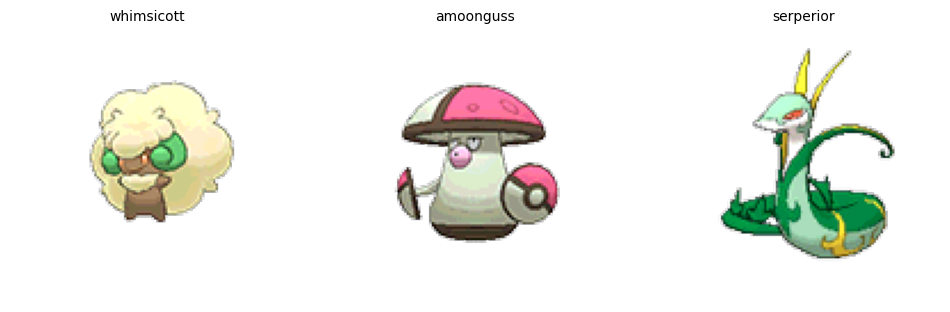

Type: Fire


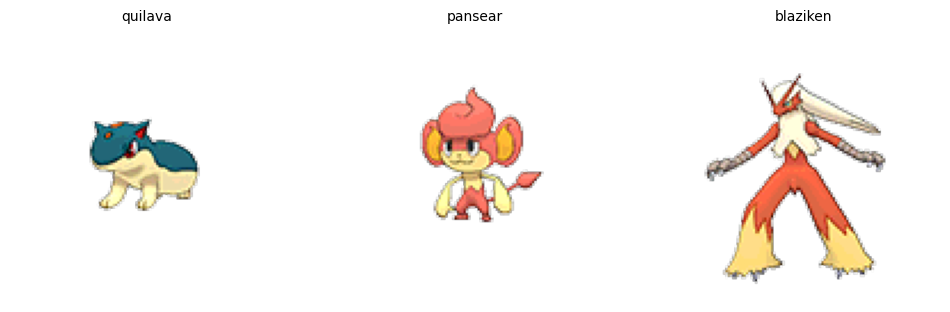

Type: Water


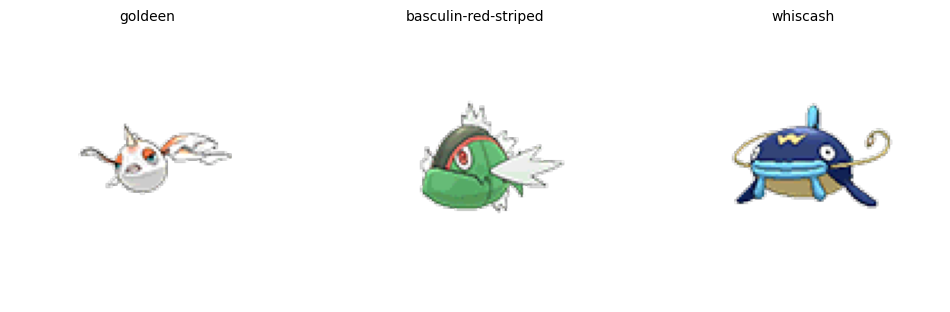

Type: Bug


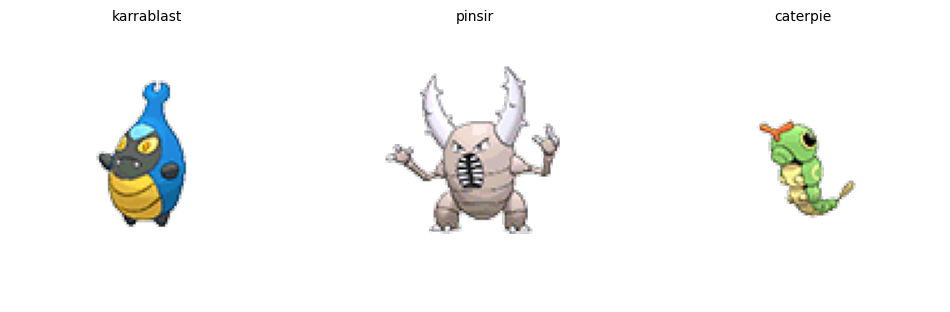

Type: Normal


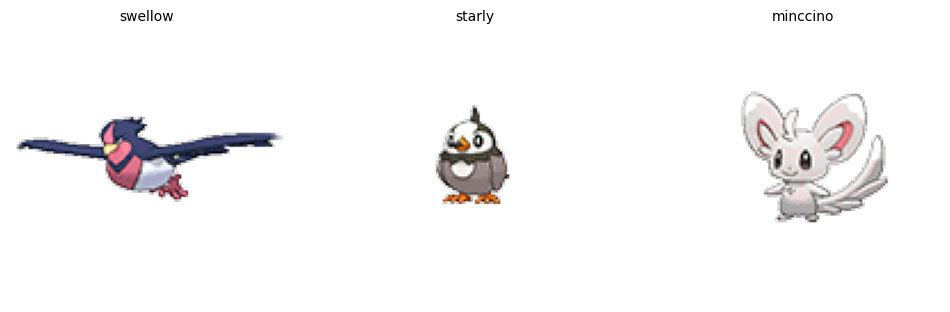

Type: Poison


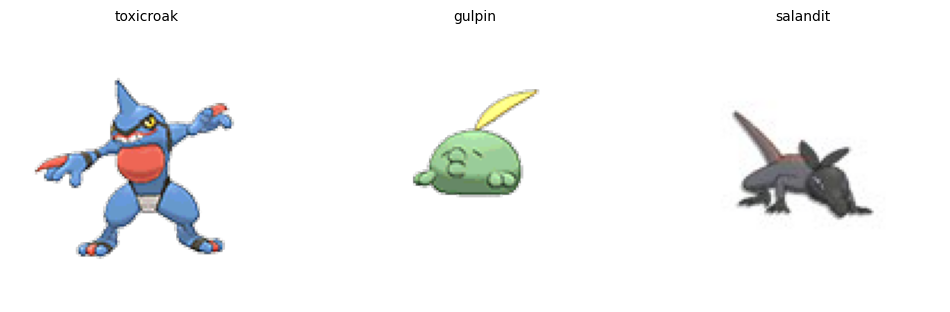

Type: Electric


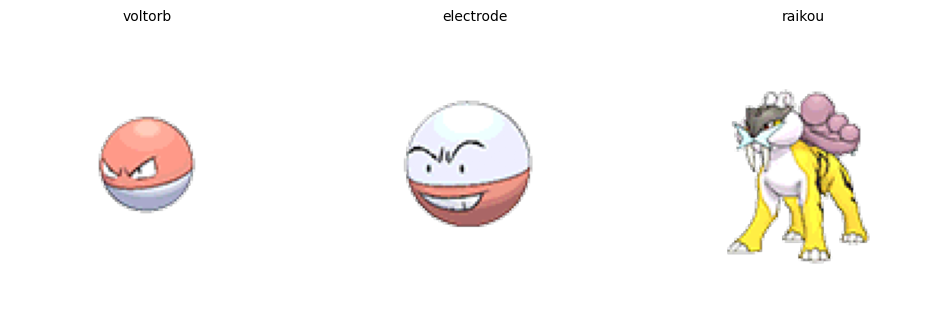

Type: Ground


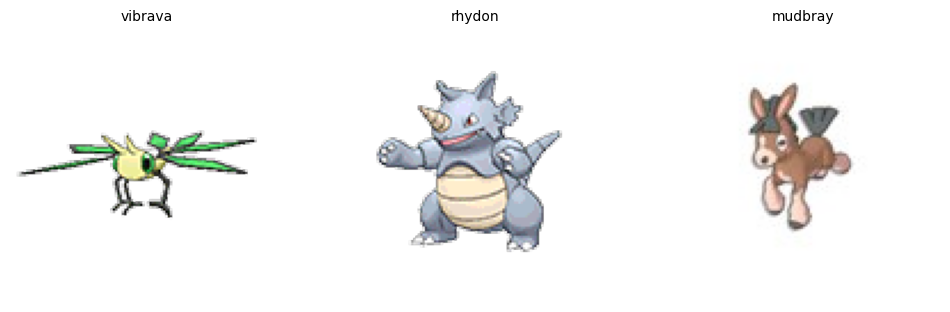

Type: Fairy


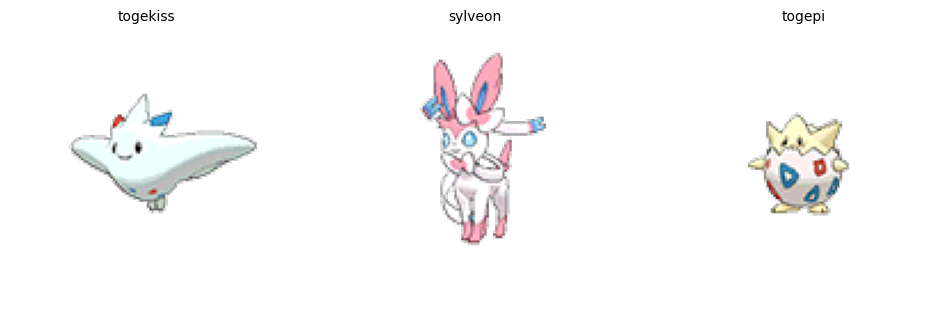

Type: Fighting


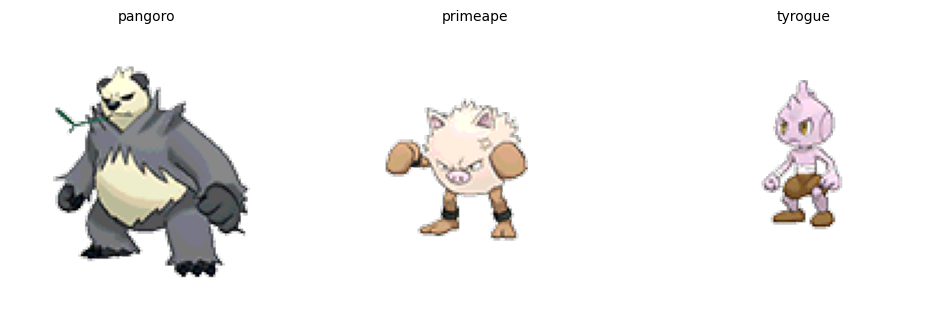

Type: Psychic


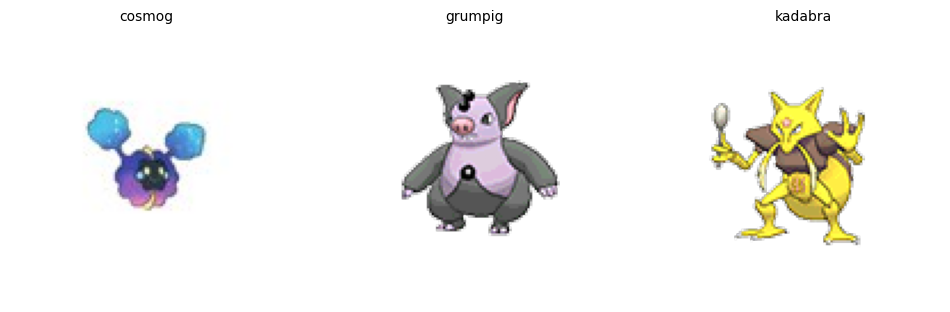

Type: Rock


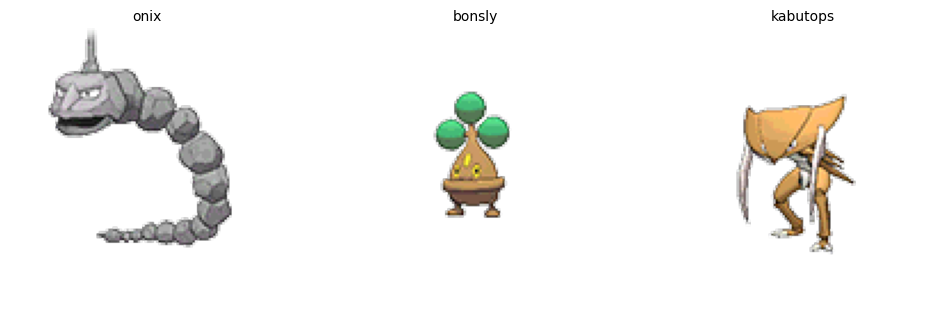

Type: Ghost


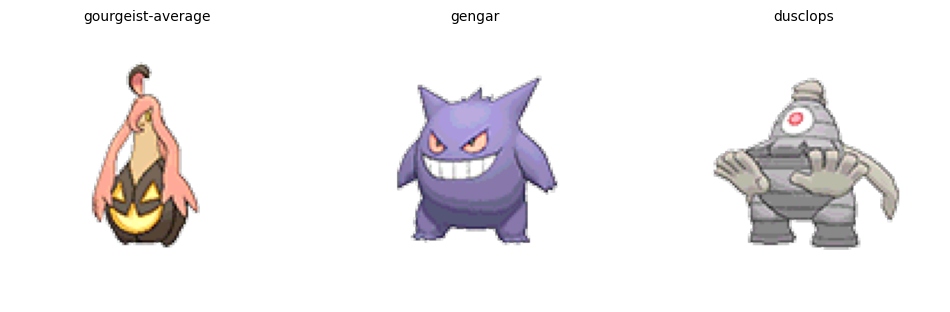

Type: Ice


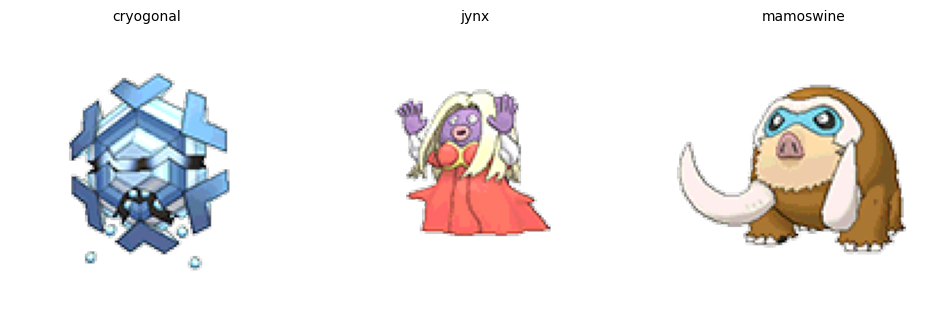

Type: Dragon


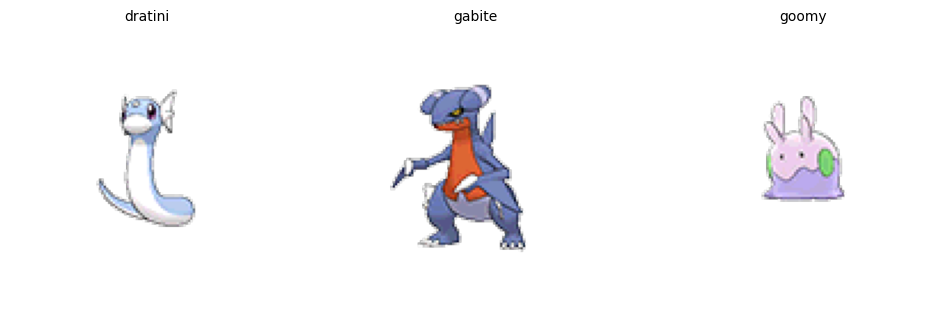

Type: Dark


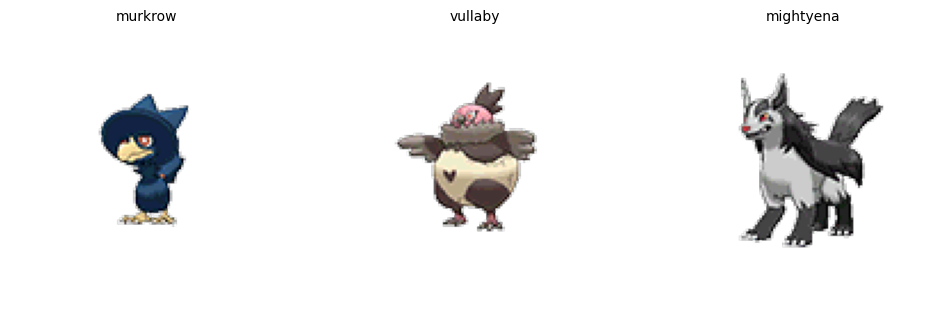

Type: Steel


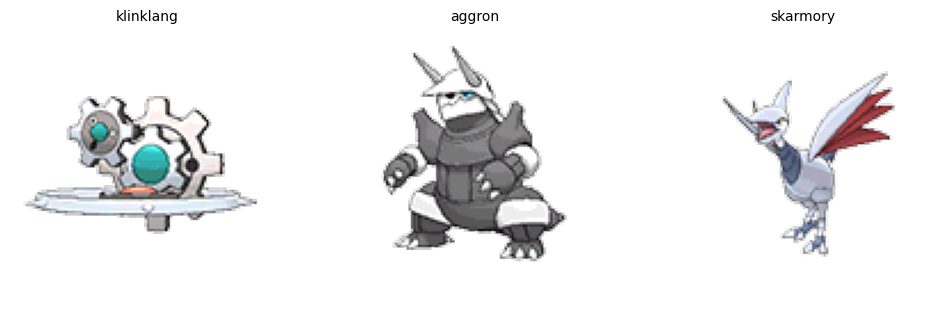

Type: Flying


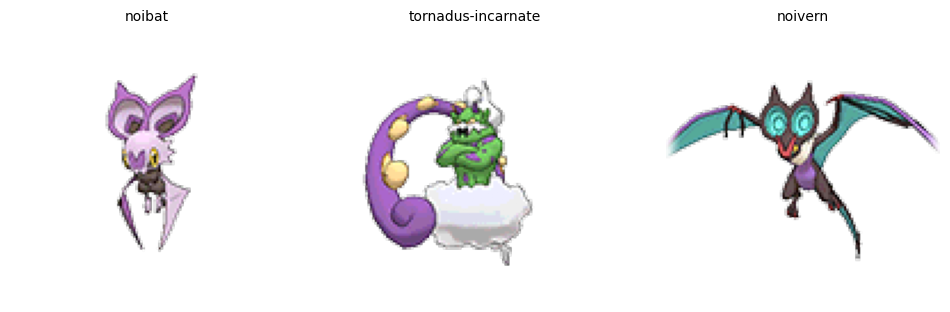

In [9]:
#3 images of pokemons from each type
cols = 3

for t in pokemones['Type1'].unique():
    sample = pokemones[pokemones['Type1'] == t]['Name']
    sample = sample.sample(3)  
    print(f'Type: {t}')
    #Figure
    fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(12, 4))
    
    for i, p in enumerate(sample):
        ax = axes[i]
        ax.axis('off')
        img_path = None
        for ext in ['png', 'jpg']:
            if os.path.exists(f'./{t}/{p}.{ext}'):
                img_path = f'./{t}/{p}.{ext}'
                break
        if img_path:
            img = mpimg.imread(img_path)
            ax.imshow(img)
            ax.set_title(p, fontsize=10)
        else:
            ax.text(0.5, 0.5, 'No image', ha='center', va='center', fontsize=12)

    plt.show()

In [10]:
#Train and test data

#Crea una carpeta llamda train y mete el 80% de las imagenes de cada tipo

os.makedirs('./train', exist_ok=True)
os.makedirs('./test', exist_ok=True)

for t in pokemones['Type1'].unique():
    os.makedirs(f'./train/{t}', exist_ok=True)
    os.makedirs(f'./test/{t}', exist_ok=True)

    # Lista de nombres de Pokémon de este tipo
    poks= pokemones[pokemones['Type1'] == t]['Name']
    
    # Seleccionar 80% aleatorio para train
    train_pok = poks.sample(frac=0.8, random_state=42)  

    for p in poks:
        for ext in ['png', 'jpg']:
            im_path = f'./{t}/{p}.{ext}'
            if os.path.exists(im_path):
                if p in train_pok.values:
                    shutil.copy(im_path, f'./train/{t}')
                else:
                    shutil.copy(im_path, f'./test/{t}')
                break  

In [11]:
#Cantidad de canales por imagen

def channels(path):
    #Yransformar imagen
    img = Image.open(path).convert("RGBA")  
    #CAnales
    r, g, b, a = img.split()
    #White background
    white_bg = Image.new("RGB", img.size, (255, 255, 255))
    white_bg.paste(img, mask=a)
    white_bg.save(path)

In [12]:
#Reemplazo

for f in ['train', 'test']:
    for t in pokemones['Type1'].unique():
        for p in os.listdir(f'./{f}/{t}'):
            try:
                channels(f'./{f}/{t}/{p}')
            except Exception as e:
                print(f"Error con la imagen {p}: {e}")

## Generalización

In [13]:
ImageDataGenerator?

Init signature:
ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,
)
Docstring:      DEPRECATED.
File:           ~/Library/Python/3.9/lib/python/site-packages/keras/src/legacy/preprocessing/image.py
Type:           type
Subclasses:     

In [14]:
#Train, validation and test data

#Train
dgen_train = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,          # Rotaciones de hasta 15°
    width_shift_range=0.1,      # Desplazamiento horizontal del 10%
    height_shift_range=0.1,     # Desplazamiento vertical del 10%
    zoom_range=0.2,             # Zoom aleatorio del 20%
    brightness_range=[0.8, 1.2]   # Variación en el brillo
)

#Validation
dgen_validation = ImageDataGenerator(rescale=1./255)

#Test
dgen_test = ImageDataGenerator(rescale=1./255)

#Parameters
TARGET_SIZE = (200, 200)
BATCH_SIZE = 32
CLASS_MODE = 'categorical'

In [15]:
#Generators
ptrain = './train'
ptest = './test'

train_generator = dgen_train.flow_from_directory(ptrain, target_size=TARGET_SIZE, class_mode=CLASS_MODE, batch_size=BATCH_SIZE, subset='training')
validation_generator = dgen_train.flow_from_directory(ptrain, target_size=TARGET_SIZE, class_mode=CLASS_MODE, batch_size=BATCH_SIZE, subset='validation')
test_generator = dgen_test.flow_from_directory(ptest, target_size=TARGET_SIZE, class_mode=CLASS_MODE, batch_size=BATCH_SIZE)

Found 525 images belonging to 18 classes.
Found 121 images belonging to 18 classes.
Found 163 images belonging to 18 classes.


In [16]:
train_generator.class_indices, train_generator.image_shape

({'Bug': 0,
  'Dark': 1,
  'Dragon': 2,
  'Electric': 3,
  'Fairy': 4,
  'Fighting': 5,
  'Fire': 6,
  'Flying': 7,
  'Ghost': 8,
  'Grass': 9,
  'Ground': 10,
  'Ice': 11,
  'Normal': 12,
  'Poison': 13,
  'Psychic': 14,
  'Rock': 15,
  'Steel': 16,
  'Water': 17},
 (200, 200, 3))

## Modelo

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=train_generator.image_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

/Users/josemariareyesfigueroa/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 196, 196, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    37,748,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,774,546 (144.10 MB)

 Trainable params: 37,774,546 (144.10 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Compile

model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Early stopping and checkpoint

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)
checkpoint = tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',save_best_only=True,save_weights_only=False,
                                                monitor='val_accuracy')

In [22]:
#Training

history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[early_stopping, checkpoint])

/Users/josemariareyesfigueroa/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0948 - loss: 13.0417

17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.0953 - loss: 12.7668 - val_accuracy: 0.1488 - val_loss: 2.7710
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.1532 - loss: 2.7743 - val_accuracy: 0.1488 - val_loss: 2.7593
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.1384 - loss: 2.7515 - val_accuracy: 0.1322 - val_loss: 2.7472
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1060 - loss: 2.7424

17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.1070 - loss: 2.7430 - val_accuracy: 0.1818 - val_loss: 2.7074
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1482 - loss: 2.6852

17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.1490 - loss: 2.6843 - val_accuracy: 0.1983 - val_loss: 2.6703
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.1771 - loss: 2.6574 - val_accuracy: 0.1983 - val_loss: 2.6417
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.1651 - loss: 2.6135 - val_accuracy: 0.1818 - val_loss: 2.6506
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1768 - loss: 2.6214

17/17 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.1774 - loss: 2.6207 - val_accuracy: 0.2066 - val_loss: 2.6247
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.2163 - loss: 2.5414 - val_accuracy: 0.2066 - val_loss: 2.7073
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1949 - loss: 2.6172 - val_accuracy: 0.1983 - val_loss: 2.6373
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1931 - loss: 2.5258

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1926 - loss: 2.5271 - val_accuracy: 0.2645 - val_loss: 2.6705
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2242 - loss: 2.5866 - val_accuracy: 0.1901 - val_loss: 2.6349
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2160 - loss: 2.5160 - val_accuracy: 0.2645 - val_loss: 2.6035
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2082 - loss: 2.5475 - val_accuracy: 0.2149 - val_loss: 2.6010
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2118 - loss: 2.4584

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2128 - loss: 2.4584 - val_accuracy: 0.2810 - val_loss: 2.5423
Epoch 16/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2229 - loss: 2.4344 - val_accuracy: 0.2645 - val_loss: 2.5595
Epoch 17/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.2755 - loss: 2.3914 - val_accuracy: 0.2479 - val_loss: 2.6016
Epoch 18/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.2777 - loss: 2.3887 - val_accuracy: 0.2727 - val_loss: 2.4591
Epoch 19/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2670 - loss: 2.4221 - val_accuracy: 0.2397 - val_loss: 2.4792
Epoch 20/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2572 - loss: 2.4123

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2586 - loss: 2.4112 - val_accuracy: 0.3140 - val_loss: 2.5153
Epoch 21/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2766 - loss: 2.3325 - val_accuracy: 0.2397 - val_loss: 2.5171
Epoch 22/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2436 - loss: 2.3840 - val_accuracy: 0.2810 - val_loss: 2.4800
Epoch 23/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3234 - loss: 2.3029 - val_accuracy: 0.2562 - val_loss: 2.5374
Epoch 24/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3067 - loss: 2.3167 - val_accuracy: 0.2810 - val_loss: 2.5447
Epoch 25/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3126 - loss: 2.2621 - val_accuracy: 0.2975 - val_loss: 2.5270
Epoch 26/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3430 - loss: 2.1911 - val_accuracy: 0.2479 - val_loss: 2.5861
Epoch 27/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3064 - loss: 2.2269 - val_accuracy: 0.2975 - val_loss: 2.4

17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3225 - loss: 2.2036 - val_accuracy: 0.3388 - val_loss: 2.4462
Epoch 29/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3409 - loss: 2.2283 - val_accuracy: 0.2562 - val_loss: 2.5418
Epoch 30/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3050 - loss: 2.2414 - val_accuracy: 0.2893 - val_loss: 2.4673
Epoch 31/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3696 - loss: 2.1175 - val_accuracy: 0.2727 - val_loss: 2.5041
Epoch 32/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3216 - loss: 2.2354 - val_accuracy: 0.2645 - val_loss: 2.4566
Epoch 33/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3274 - loss: 2.1313 - val_accuracy: 0.3388 - val_loss: 2.4656
Epoch 34/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.3059 - loss: 2.2444 - val_accuracy: 0.3140 - val_loss: 2.5266
Epoch 35/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3786 - loss: 2.1195 - val_accuracy: 0.2314 - val_loss: 2.4

KeyboardInterrupt: 

In [ ]:
#df = history.history

In [ ]:
#df = pd.DataFrame(df)

In [ ]:
#df

,accuracy,loss,val_accuracy,val_loss
0,0.097143,14.751693,0.148760,2.799977
1,0.139048,2.787817,0.115702,2.871909
2,0.139048,2.721463,0.140496,2.853372
3,0.158095,2.683619,0.223140,2.841759
4,0.144762,2.681308,0.165289,2.797435
5,0.180952,2.617737,0.206612,2.760215
6,0.194286,2.574906,0.198347,2.740134
7,0.226667,2.510589,0.206612,2.732631
8,0.243810,2.454807,0.198347,2.719156
9,0.243810,2.447953,0.198347,2.699911


In [ ]:
#Estructuras de carpetas

#./train
#    /Type1
#        /pokemon1
#        /pokemon2
#        ...
#./test
#    /Type1
